# Prediction Using Unsupervised ML | Task 2

## From the given 'Iris' dataset, predict the optimum number of clusters and represent it virtually

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Taking only the necessary columns

df = df.loc[:, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Finding the Sum of Square Error and appending in sse array

k_rng= range(1,11)
sse=[]
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

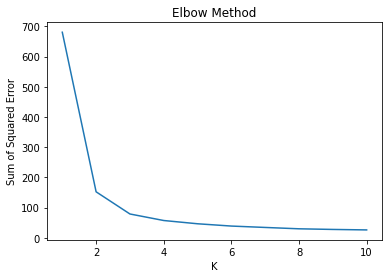

In [5]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method')
plt.plot(k_rng, sse)

In [6]:
# Taing 3 as no. of clusters using the Elbow method

km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [7]:
# Adding cluster column to the dataframe
df['cluster']= y_predicted
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [8]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]
clu_centers=km.cluster_centers_

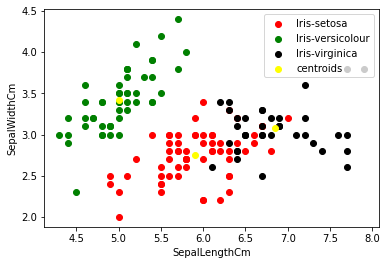

In [9]:
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(df1.SepalLengthCm, df1.SepalWidthCm, c='red', label = 'Iris-setosa')
plt.scatter(df2.SepalLengthCm, df2.SepalWidthCm, c='green', label = 'Iris-versicolour')
plt.scatter(df3.SepalLengthCm, df3.SepalWidthCm, c='black', label = 'Iris-virginica')
plt.scatter(clu_centers[:,0], clu_centers[:,1], c='yellow', label='centroids')
plt.legend(loc='upper right')